# Sommaire

1. [Chargement des librairies](#graph-domanialite)
2. [Chargement du jeu de données](#graph-domanialite)
3. [Présentation générale du jeu de données](#graph-domanialite)
4. [Aberration](#graph-domanialite)
5. [Nettoyage](#graph-domanialite)
6. [Analyse](#graph-domanialite)
7. [Synthèse](#graph-domanialite)

# Optimisation des tournées pour l’entretien des arbres de la ville de Paris

![Logo de la ville de Paris](data/image/logo.png)

L'objectif est de réaliser une analyse exploratoire à partir du jeu de données de [opendata.paris.fr](https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=13,48.86844,2.30945&basemap=jawg.streets) portant sur les arbres de la ville de Paris, dans le cadre du programme “Végétalisons la ville”.

![Végétalisons Paris](data/image/Végétalisation-de-Paris.png)

Les résultats contribueront à une optimisation des tournées pour l’entretien des arbres de la ville. Car s'il y a moins de déplacements, il y a moins de trajets donc plus d’arbres maintenus.

Nous commencerons par mettre en place notre environnement de travail. Ensuite, nous procèderons à une exploration des données. Puis, un nettoyage de ces données. Par la suite, nous les analyserons. De ces analyses, nous en ferons des visualisations pour finaliser avec une synthèse.

Les étapes sont accompagnées d’explications vulgarisées pour le rendre accessible à tout public.

## Mise en place de l'environnement de travail

![Logo de Conda](data/image/conda.png)

Avant de commencer à étudier le sujet, nous allons d'abord mettre en place notre environnement afin de travailler dans des conditions favorables.

Dans cette étape, nous isolons notre travail dans un environnement virtuel avec toutes les dépendances nécessaires à son fonctionnement à l'aide de l'outil Conda d’Anaconda.

## Chargement des librairies

Une fois dans l’environnement virtuel, nous pouvons charger les dépendances nécessaires à la réalisation du projet.

In [1]:
# Lecture et traitement des données
import json
import pandas as pd

# Imputation
from sklearn.impute import SimpleImputer

# Visualisation
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
from sklearn.impute import SimpleImputer

## Chargement du jeu de données

Nous demandons à Pandas, qui est un outil d'analyse de données, de lire le contenu du fichier.

In [3]:
data_arbres = pd.read_csv("data/p2-arbres-fr.csv", sep=';')
data_arbres.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


## Présentation générale du jeu de données

Dans cette étape, nous allons explorer le contenu du fichier.

### Dimensionnalité

In [4]:
print(
    f"Le fichier est constitué de {data_arbres.shape[0]} lignes et de {data_arbres.shape[1]} colonnes."
)

Le fichier est constitué de 200137 lignes et de 18 colonnes.


### Nombre d'arbres par dominalité

In [5]:
# arbre par dominalité
top_dominalite = data_arbres['domanialite'].value_counts(normalize=True).rename_axis('domanialite').reset_index(name='frequence')
top_dominalite['frequence'] = top_dominalite['frequence'].round(2)*100
top_dominalite['frequence'] = top_dominalite['frequence'].astype(int)
top_dominalite

,domanialite,frequence
0,Alignement,52
1,Jardin,23
2,CIMETIERE,16
3,DASCO,3
4,PERIPHERIQUE,3
5,DJS,2
6,DFPE,1
7,DAC,0
8,DASES,0


In [6]:
# Une seule couleur
# Taille du texte

<a id='graph-domanialite'></a>

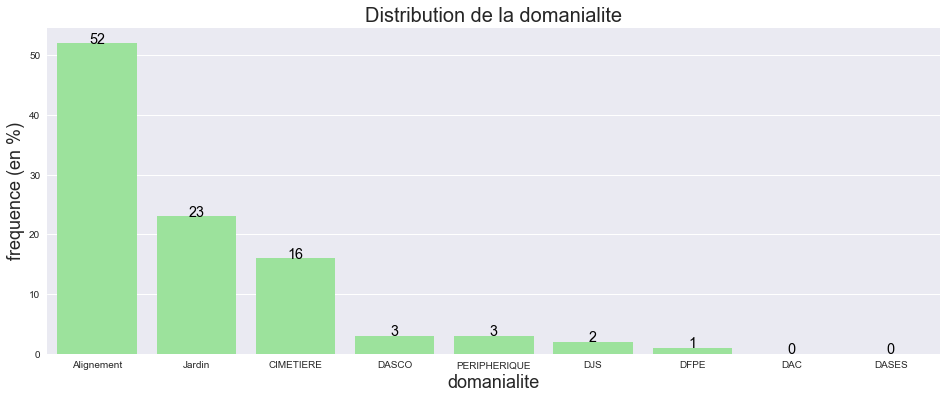

In [7]:
plt.figure(figsize=(16, 6))
plt.title('Distribution de la domanialite', fontsize=20)
g = sns.barplot(x="domanialite", y="frequence", data=top_dominalite, color='lightgreen')
g.set_xlabel("domanialite",fontsize=18)
g.set_ylabel("frequence (en %)",fontsize=18)
for index, row in top_dominalite.iterrows():
    g.text(index, row.frequence, row.frequence, color='black', ha="center", size="x-large")

Les arbres sont majoritairement situés en alignement avec 52%. Ils sont également situés en grand nombre dans les jardins (23%) et dans les cimetières (16%).

### Information

In [8]:
print(f"Le type de données pour chaque colonne est : \n")

data_arbres.info()

Le type de données pour chaque colonne est : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  

Nous pouvons remarquer l'existence de données manquantes (NULL ou NaN), dont 100% pour la colonne "numero".
Explorons un peu plus en détail ces données manquantes. Ensuite, vérifions si les types correspondent bien aux colonnes.

### Données manquantes

In [9]:
pd.DataFrame(data_arbres.isna().mean().round(4) * 100,
             columns=['Données manquantes en %'
                      ]).sort_values(by='Données manquantes en %',
                                     ascending=False)

,Données manquantes en %
numero,100.00
complement_addresse,84.56
variete,81.62
stade_developpement,33.58
remarquable,31.53
espece,0.88
libelle_francais,0.75
genre,0.01
geo_point_2d_a,0.00
hauteur_m,0.00


Analysons brièvement les colonnes contenant des valeurs manquantes dans l'ordre décroissant.

- **"numero"** à 100% : corresponds certainement au numéro d'adresse de "lieu". La colonne "lieu" indiquant déjà l'adresse, il ne semble pas nécessaire de corriger ou conserver cette colonne.
- **"complement_adresse"** à 84,6% : les adresses ne contiennent pas forcément des compléments, cependant par rapport au lieu ou aux points géographiques nous pouvons déterminer si des compléments sont manquants.
- **"variete"** à 81,6% : afin de remplir les données manquantes, nous pouvons analyser les colonnes "libelle_francais", "genre" et "espece" qui contiennent des variétés et analyser la corrélation.
- **"stade_developpement"** à 33,6% : Corresponds à l'âge de l'arbre. Il nous est possible d'estimer les valeurs NULL en comparant "libelle_francais", "genre", "espece" ou "variete" avec "circonference_cm" et "hauteur_m".
- **"remarquable"** à 31,5% : Un arbre remarquable relève d'un patrimoine par sa rareté, ses dimensions, sa position, son âge ou encore sa force symbolique. Certaines valeurs peuvent donc être estimées par des critères concrets comme l'espèce, la hauteur, la dimension, le stade de développement ou la position, mais aussi par des critères abstraits comme le symbole. Comme il est difficile d'estimer une valeur basée sur une notion abstraite, il est possible d'améliorer la pertinence en collectant des données externes permettant de remplir ces valeurs.
- **"espece"** à 0,9%, **"libelle_francais"** à 0,7% et **"genre"** à 0,01% : Le nombre de valeurs manquantes étant très faible il sera aisé de les remplir en utilisant une méthode semblable à "variete".
- **"id"** à 0% : Les ID sont par définition non nuls et uniques.

Cette étape nous a permis de développer quelques stratégies permettant de remplir les valeurs manquantes.

Cependant avant de pouvoir remplir les données manquantes, il faudra prendre soin d'analyser s'il n'y a pas d’aberration, c'est-à-dire des erreurs, parmi les valeurs présentes et de les corriger si c'est le cas. Nous verrons cela dans les prochaines étapes.

Nous allons tout d'abord vérifier les valeurs uniques des colonnes.
Ensuite, nous pourrons rechercher les doublons et aberrations.

- https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
- https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
- https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2021/02/introduction-to-exploratory-data-analysis-eda/
- distribution circonférence, hauteur. Loi normale ? Poisson ?
- dataframe valeurs abérentes, hotlyer.
- carte
- Finalité : proposer une idée, une appli ? Possibilité de choisir le type d'arbre à traiter

### Données uniques

In [10]:
data_arbres.apply(lambda col: col.unique())

id                     [99874, 99875, 99876, 99877, 99878, 99879, 998...
type_emplacement                                                 [Arbre]
domanialite            [Jardin, Alignement, DJS, DFPE, CIMETIERE, DAS...
arrondissement         [PARIS 7E ARRDT, PARIS 17E ARRDT, PARIS 16E AR...
complement_addresse    [nan, c 12, 12-36, 12-35, face 64 Manin, 19-02...
numero                                                             [nan]
lieu                   [MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E, PA...
id_emplacement         [19, 20, 21, 22, 000G0037, 000G0036, 000G0035,...
libelle_francais       [Marronnier, If, Erable, Arbre à miel, Platane...
genre                  [Aesculus, Taxus, Acer, Tetradium, Platanus, S...
espece                 [hippocastanum, baccata, negundo, daniellii, x...
variete                [nan, Atropunicea', Euchlora', Schwedleri', Pi...
circonference_cm       [20, 65, 90, 60, 38, 37, 260, 145, 135, 15, 30...
hauteur_m              [5, 8, 10, 0, 17, 14, 3, 6, 

Mis à part la colonne "type_emplacement" qui ne contient que "Arbre" et la colonne "numero" qui ne contient rien du tout, il n'y a rien de particulier à signaler. Si ce n'est par exemple certains "domanialite" tout en majuscule (ex. : CIMETIERE -> Cimetiere)

Quand est-il des doublons ?

Compte tenu de la consigne du projet qui suggère de ne pas trop s'attarder sur l’exploration, nous nous limiterons à "id" et aux coordonnées géographiques.

### Doublons

In [11]:
# Analyse des doublons de "id"
data_arbres[data_arbres.duplicated(['id'])]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b


"id" ne semble pas avoir de doublons. Nous pouvons donc estimer que cette colonne est correcte, car les id sont actuellement non nuls et uniques.

In [12]:
# Recherche de doublons dans les coordonnées géographiques
data_arbres[data_arbres.duplicated(['geo_point_2d_a', 'geo_point_2d_b'],
                 keep=False)].sort_values(["geo_point_2d_a", "geo_point_2d_b"])

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
185479,2006187,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE DAUPHINE,402029,Tilleul,Tilia,platyphyllos,NaN,0,0,NaN,0.0,48.829912,2.439665
185480,2006188,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE DAUPHINE,402030,Tilleul,Tilia,platyphyllos,NaN,0,0,NaN,0.0,48.829912,2.439665
189133,2011522,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,190042,Peuplier,Populus,nigra,NaN,0,0,NaN,0.0,48.836416,2.446277
189134,2011523,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,190042,Peuplier,Populus,nigra,Italica',100,22,A,0.0,48.836416,2.446277
188329,2010634,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,210034,Hêtre,Fagus,sylvatica,Rotundifolia',75,8,JA,0.0,48.836862,2.446518
193577,2016369,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,210035,Pommier à fleurs,Malus,trilobata,NaN,0,0,NaN,0.0,48.836862,2.446518
10099,112286,Arbre,Jardin,PARIS 12E ARRDT,NaN,NaN,JARDIN PARTAGE BEL-AIR,5,Ailante,Ailanthus,altissima,NaN,0,0,NaN,NaN,48.838318,2.406610
10100,112287,Arbre,Jardin,PARIS 12E ARRDT,NaN,NaN,JARDIN PARTAGE BEL-AIR,6,Ailante,Ailanthus,altissima,NaN,0,0,NaN,NaN,48.838318,2.406610
188427,2010732,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20069,Cèdre,Cedrus,libani subsp. atlantica,NaN,110,18,A,0.0,48.838539,2.439350
193587,2016379,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20129,Cèdre,Cedrus,libani subsp. atlantica,NaN,0,0,NaN,0.0,48.838539,2.439350


L'analyse de ces doublons nous apprend ceci :
- Des arbres sont identiques, mais ont un "id_emplacement" qui diffère, très souvent de +1
- Certains arbres identiques avec le même "id_emplacement" ont des données NULL dans l'un et remplies dans l'autre
- Certains arbres ont une espèce différente au même endroit. Peut-être que des arbres ont été remplacés depuis et que le doublon correspond à un ancien arbre qui n'existe plus. Si c'est le cas, comment reconnaitre le plus récent sans la date ? Peut-être avec "stade_developpement" le plus jeune si disponible. Ou plus simplement par l'"id" le plus grand.
- Des arbres identiques présentent des lieux différents comme "domanialite" (ex. : Jardin -> PERIPHERIQUE) et "id_emplacement" (1 -> 09VO19001), mais aussi un "lieu" identique, mais rédigé différemment (VOIE DF19 -> VOIE \n DF/19). Il y a certainement une corrélation entre "domanialite" et le type de "id_emplacement" et la rédaction de "lieu".

Ces doublons sont sûrement dû à l'imprécision du gps lors de l'entrée des données.

## Aberration

Dans cette partie, nous allons analyser les données à la recherche d'incohérences. Nous pouvons nous baser sur deux méthodes :

* rechercher quel est l'arbre le plus haut de france et supprimer toutes les lignes dont la hauteur est supérieurs à cette arbre. Même démarche pour la circonférence.
* identifier les valeurs aberrantes avec une méthode statistique : l'écart interquartile (EI)

L'arbre le plus haut de France mesure 66,60 m de hauteur. https://www.monumentaltrees.com/fr/records/fra/

![Arbre le plus haut de France](data/image/arbre_haut.jpg)

L'arbre le plus épais de France mesure 13,89 m de circonférence.

![Arbre le plus épais de France](data/image/arbre_circonf.png)

### Vue d'ensemble

Observons quelques détails statistiques de base comme le percentile, la moyenne, l'écart type, etc.

In [13]:
data_arbres.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


En se fiant à l'écart type, 2 colonnes sortent du lot : "circonference_cm" et "hauteur_m".
Leurs valeurs max sont en effet aberrant 250 255 centimètres pour la circonférence et 881 818 mètres pour la hauteur. Ces chiffres dépassent de manière évidente la réalité.
Une erreur d'échelle a dû avoir lieu lors de l'entrée des données.

En ce qui concerne les valeurs égales à 0, nous pouvons nous demander s'il faut les considérer comme des valeurs nulles, ou un arbre dont la valeur est inférieure à 1. En effet, les valeurs sont arrondies donc toutes celles inférieures à 0.5 seront égales à 0.

### Analyse de la hauteur et de la circonférence

#### Nombre de valeurs égales à 0

In [14]:
nb0 = data_arbres[["circonference_cm", "hauteur_m"]]
zero_percentage = nb0[nb0 == 0].count()
zero_percentage

circonference_cm    25867
hauteur_m           39219
dtype: int64

In [15]:
zero_value_circonference = round(zero_percentage[0]/len(data_arbres) *100, 1)
zero_value_hauteur = round(zero_percentage[1]/len(data_arbres) *100, 1)

print(f"Pourcentage de valeurs égales à zéro pour la circonférence: {zero_value_circonference}%")
print(f"Pourcentage de valeurs égales à zéro pour la hauteur: {zero_value_hauteur}%")

Pourcentage de valeurs égales à zéro pour la circonférence: 12.9%
Pourcentage de valeurs égales à zéro pour la hauteur: 19.6%


Soit 12,9% des valeurs de circonference_cm sont des 0 et 19.6% pour hauteur_m. Les valeurs sont arrondies donc les valeurs inférieures à 0.5 sont à arrondies à 0.

#### Identification des valeurs aberrantes avec le filtre du record de France
Pour rappel, l'arbre le plus haut de France mesure 66,6m de hauteur et l'arbre le plus épais mesure 13,9m de circonférence.

In [16]:
outliers = data_arbres[(data_arbres["hauteur_m"] > 66) | (data_arbres["circonference_cm"] > 1390)] # m convertie en cm
outliers[["hauteur_m", "circonference_cm"]]

,hauteur_m,circonference_cm
5264,19,2439
5392,1510,100
5599,68,41
5993,6,2300
6473,117,112
...,...,...
193905,10,2150
197136,125,145
197146,105,150
198023,10,2750


In [17]:
pourcentage_aberration = round(len(outliers) * 100 / len(data_arbres), 2)
print(f"Pourcentage d'abération : {pourcentage_aberration} %")

Pourcentage d'abération : 0.19 %


In [18]:
# Dataframe sans les aberrations
data_arbres_clean = data_arbres[(data_arbres["hauteur_m"] < 66) & (data_arbres["circonference_cm"] < 1390)]
data_arbres_clean

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956


#### Identification des valeurs aberrantes avec l'écart interquartile (EI)

L'écart interquartile (EI) est une mesure de dispersion statistique et est calculé comme la différence entre les 75e et 25e percentiles. Il est représenté par la formule EI = Q3 - Q1. Les lignes de code ci-dessous calculent et affichent l'écart interquartile pour la circonférence et la hauteur.

In [19]:
Q1 = data_arbres_clean[["circonference_cm", "hauteur_m"]].quantile(0.25)
Q3 = data_arbres_clean[["circonference_cm", "hauteur_m"]].quantile(0.75)
EI = Q3 - Q1
EI

circonference_cm    85.0
hauteur_m            7.0
dtype: float64

La sortie ci-dessus affiche les scores d'EI, qui peuvent être utilisés pour détecter les valeurs aberrantes.

Comme nous avons maintenant les scores d'EI, il est temps de s'intéresser aux valeurs aberrantes. Le code ci-dessous donnera une sortie avec des valeurs vraies et fausses.
Le point de données où nous avons False signifie que ces valeurs sont valides alors que True indique la présence d'une valeur aberrante.

In [20]:
outliers2 = (data_arbres_clean[["hauteur_m", "circonference_cm"]] <
               (Q1 - 1.5 * EI)) | (data_arbres_clean[["hauteur_m", "circonference_cm"]] >
                                   (Q3 + 1.5 * EI))
outliers2

,circonference_cm,hauteur_m
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
200132,False,False
200133,False,False
200134,False,False
200135,False,False


In [21]:
pd.DataFrame(outliers2.mean().round(4) * 100,
             columns=["% d'aberration"]).sort_values(by="% d'aberration",
                                                     ascending=False)

,% d'aberration
hauteur_m,1.78
circonference_cm,1.69


#### Analyse de la circonférence

Observons sa distribution dans un diagramme en boite.

Comment lire un diagramme en boite ?

![Diagramme en boite](data/image/boite.png)

Text(0.5, 1.0, 'Distribution de la circonférence (cm)')

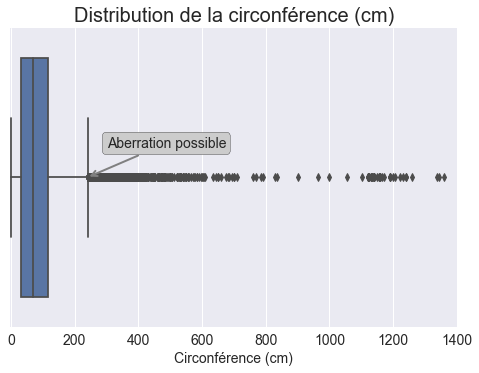

In [22]:
# diagramme en boite de la variable "circonference_cm".
ax = sns.boxplot(x=data_arbres_clean["circonference_cm"])
ax.set(xlim=(-2, 1400))

# notation indiquant une éventuelle valeur aberrante
ax.annotate('Aberration possible',
            xy=(240, 0),
            xytext=(300, -0.1),
            fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2),
            bbox=dict(boxstyle="round", fc="0.8"))

# xtick, étiquettes et titres
plt.xticks(fontsize=14)
plt.xlabel('Circonférence (cm)', fontsize=14)
plt.title('Distribution de la circonférence (cm)', fontsize=20)

Dans le résultat ci-dessus, les losanges indiquent les valeurs aberrantes, et elles sont nombreuses. Il est fortement probable que beaucoup de ces valeurs ne soient pas réellement aberrantes. Ici, l'anomalie commence à partir de 240 centimètres de circonférence.

Quand est-il de la hauteur ? :

##### Analyse de la hauteur

Text(0.5, 1.0, 'Distribution de la hauteur (m)')

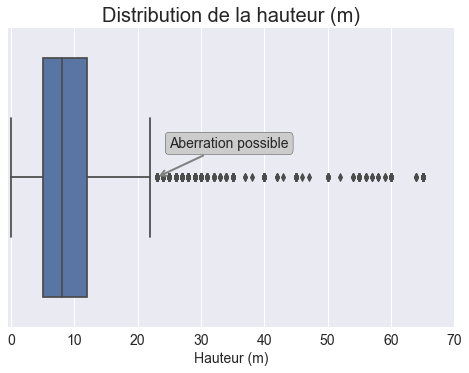

In [23]:
# diagramme en boite de la variable "hauteur_m".
ax = sns.boxplot(x=data_arbres_clean["hauteur_m"])
ax.set(xlim=(-0.5, 70))

# notation indiquant une éventuelle valeur aberrante
ax.annotate('Aberration possible',
            xy=(23, 0),
            xytext=(25, -0.1),
            fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2),
            bbox=dict(boxstyle="round", fc="0.8"))

# xtick, étiquettes et titres
plt.xticks(fontsize=14)
plt.xlabel('Hauteur (m)', fontsize=14)
plt.title('Distribution de la hauteur (m)', fontsize=20)

Ici, l'anomalie débute à partir de 22 mètres de hauteur, ce qui est cohérent.

In [24]:
# Valeur métier à enlever en premier, ensuite la méthode statistique

## Nettoyage

Précédemment, nous avons vu la présence de données vide, d'erreur de type et d'anomalie de valeurs dans le jeu de données.

Nous allons donc adopter une stratégie de nettoyage pour les erreurs détectées les plus importantes. Ensuite, nous pourrons procéder à quelques analyses.

### Remplissage des valeurs manquantes

* https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation Simple imputer
* https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation
* https://www.kaggle.com/questions-and-answers/153147

* https://scikit-learn.org/stable/modules/impute.html
* https://machinelearningmastery.com/handle-missing-data-python/
valeur remarquable

Imputation en utilisant la librairie scikitlearn.
Regardons dans un premier temps les colonnes qui ont des valeurs manquantes.

In [25]:
data_arbres.isna().any()

id                     False
type_emplacement       False
domanialite             True
arrondissement         False
complement_addresse     True
numero                  True
lieu                   False
id_emplacement         False
libelle_francais        True
genre                   True
espece                  True
variete                 True
circonference_cm       False
hauteur_m              False
stade_developpement     True
remarquable             True
geo_point_2d_a         False
geo_point_2d_b         False
dtype: bool

In [26]:
# Récupération des noms de colonnes pour la dataframe ci-dessous
columns_name = list(data_arbres.columns)
columns_name.remove('complement_addresse')

In [27]:
imp = SimpleImputer(strategy="most_frequent")
data_arbres = imp.fit_transform(data_arbres)
data_arbres

array([[99874, 'Arbre', 'Jardin', ..., 0.0, 48.8576199541, 2.3209621099],
       [99875, 'Arbre', 'Jardin', ..., 0.0, 48.8576560697, 2.3210314229],
       [99876, 'Arbre', 'Jardin', ..., 0.0, 48.8577050069, 2.321060566],
       ...,
       [2024743, 'Arbre', 'Jardin', ..., 0.0, 48.8229071371,
        2.4579700696],
       [2024744, 'Arbre', 'Jardin', ..., 0.0, 48.8225223402,
        2.4559555462],
       [2024745, 'Arbre', 'Jardin', ..., 0.0, 48.8204447881,
        2.4548562244]], dtype=object)

In [28]:
data_arbres = pd.DataFrame(data_arbres, columns=columns_name)
data_arbres

,id,type_emplacement,domanialite,arrondissement,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,SN°,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,Baumannii',20,5,A,0.0,48.85762,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,SN°,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,Baumannii',65,8,A,0.0,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,SN°,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,Baumannii',90,10,A,0.0,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,SN°,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,Baumannii',60,8,A,0.0,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,SN°,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,Baumannii',38,0,A,0.0,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,SN°,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,Platane,Castanea,fargesii,Baumannii',0,0,A,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,SN°,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,Baumannii',0,0,A,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,SN°,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,Baumannii',0,0,A,0.0,48.822907,2.45797
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,SN°,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,Baumannii',0,0,A,0.0,48.822522,2.455956


In [29]:
data_arbres.isna().any()

id                     False
type_emplacement       False
domanialite            False
arrondissement         False
numero                 False
lieu                   False
id_emplacement         False
libelle_francais       False
genre                  False
espece                 False
variete                False
circonference_cm       False
hauteur_m              False
stade_developpement    False
remarquable            False
geo_point_2d_a         False
geo_point_2d_b         False
dtype: bool

Il n'y a plus de valeurs manquantes.

#### Suppression des colonnes "numéro", «variete" et "type_emplacement"

In [30]:
data_arbres.drop(['numero', 'variete', 'type_emplacement'], inplace=True, axis=1)

#### Conversion de la colonne remarque en booléen
Si un arbre est remarquable, sa valeur vaut 1 dans la colonne remarquable.

In [31]:
data_arbres["remarquable"] = data_arbres["remarquable"].fillna(0)
data_arbres["remarquable"] = data_arbres["remarquable"].astype('bool')
len(data_arbres[data_arbres["remarquable"] == True])

184

### Doublons

In [32]:
print(f'Nombre de lignes : {len(data_arbres)}')
data_arbres = data_arbres.drop_duplicates()
print(f'Nombre de lignes après suppression des doublons : {len(data_arbres)}')

Nombre de lignes : 200137
Nombre de lignes après suppression des doublons : 200137


Il n'y a pas de doublons dans le jeu de données.

### Aberration

Précédemment, nous avons vu comment détecter les valeurs aberrantes à l'aide de l'écart interquartile (EI), mais maintenant nous voulons supprimer ou filtrer les valeurs aberrantes et obtenir des données propres. Ceci peut être fait en une seule ligne de code puisque nous avons déjà calculé l'EI.

In [33]:
data_arbres_out = data_arbres_clean[~((data_arbres_clean[["hauteur_m", "circonference_cm"]] <
               (Q1 - 1.5 * EI)) | (data_arbres_clean[["hauteur_m", "circonference_cm"]] >
                                   (Q3 + 1.5 * EI))).any(axis=1)]

In [34]:
data_arbres_out.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,1.939970e+05,0.0,193997.000000,193997.000000,132163.000000,193997.000000,193997.000000
mean,3.858860e+05,NaN,74.803280,7.925339,0.000590,48.854705,2.347988
std,5.433945e+05,NaN,55.373099,5.704763,0.024287,0.030190,0.051345
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.562580e+05,NaN,30.000000,4.000000,0.000000,48.835183,2.307210
50%,2.211530e+05,NaN,70.000000,8.000000,0.000000,48.854263,2.350727
75%,2.739740e+05,NaN,110.000000,12.000000,0.000000,48.876583,2.387043
max,2.024745e+06,NaN,242.000000,22.000000,1.000000,48.911485,2.469759


Les valeurs max sont dorénavant plus proches de la réalité avec 22 mètres pour la hauteur au lieu de 881 818 mètres et 242 centimètres au lieu de 250 255 centimètres pour la circonférence.

Maintenant, nous pouvons analyser quelques données permettant de contribuer à l'optimisation des tournées pour l'entretien des arbres

## Analyse

Réfléchissons à des combinaisons de visualisation permettant d'optimiser les tournées d'entretien des arbres.

Par exemple, l'entretient des arbres dépend de l’âge, de l'espèce, des dimensions, du lieu et bien plus.

### Diagramme en boite

Text(0.5, 1.0, 'Distribution de la circonférence (cm)')

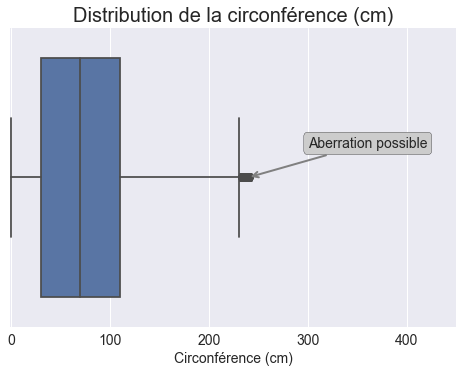

In [35]:
# diagramme en boite de la variable "circonference_cm".
ax = sns.boxplot(x=data_arbres_out["circonference_cm"])
ax.set(xlim=(-1, 450))

# notation indiquant une éventuelle valeur aberrante
ax.annotate('Aberration possible',
            xy=(240, 0),
            xytext=(300, -0.1),
            fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2),
            bbox=dict(boxstyle="round", fc="0.8"))

# xtick, étiquettes et titres
plt.xticks(fontsize=14)
plt.xlabel('Circonférence (cm)', fontsize=14)
plt.title('Distribution de la circonférence (cm)', fontsize=20)

Text(0.5, 1.0, 'Distribution de la hauteur (m)')

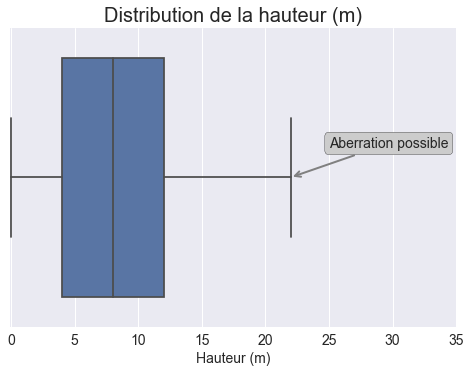

In [36]:
# diagramme en boite de la variable "hauteur_m".
ax = sns.boxplot(x=data_arbres_out["hauteur_m"])
ax.set(xlim=(-0.1, 35))

# notation indiquant une éventuelle valeur aberrante
ax.annotate('Aberration possible',
            xy=(22, 0),
            xytext=(25, -0.1),
            fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2),
            bbox=dict(boxstyle="round", fc="0.8"))

# xtick, étiquettes et titres
plt.xticks(fontsize=14)
plt.xlabel('Hauteur (m)', fontsize=14)
plt.title('Distribution de la hauteur (m)', fontsize=20)

Comparé aux diagrammes en boites du set de données original, les valeurs abérrentes ont quasiment toutes disparues

### Caractéristiques des arbres

Text(0, 0.5, 'Total')

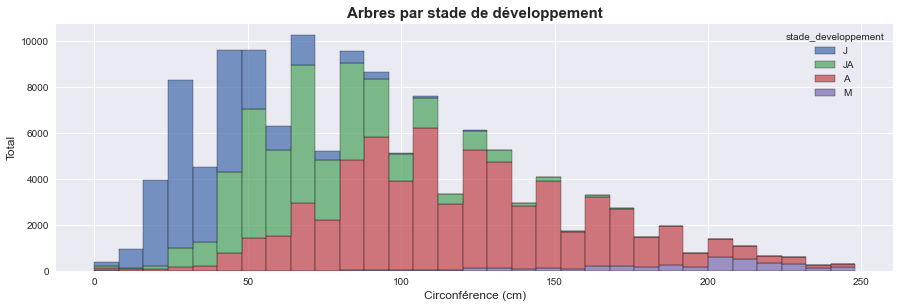

In [37]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
g = sns.histplot(data=data_arbres_out,
                 x="circonference_cm",
                 hue="stade_developpement",
                 hue_order=['J', 'JA', 'A', 'M'],
                 multiple="stack",
                 binwidth=8)
plt.title('Arbres par stade de développement', fontsize=15, fontweight='bold')
plt.xlabel('Circonférence (cm)', fontsize=12)
plt.ylabel('Total', fontsize=12)

Logiquement, plus un arbre est jeune moins sa circonférence est élevée.
Ce graphique nous donne une indication au sujet du financement de matériel d'entretien.
On remarque que les arbres les plus jeunes sont les plus nombreux, J, puis JA, ensuite A et M.
Donc pour l'inventaire du matériel, le nombre de stocks doit être plus élevé pour les arbres jeunes que mature.

### Analyse géographique

Pour optimiser les tournées, nous pouvons analyser la répartition des arbres par domanialité afin d'optimiser les trajets.
Les visualisations qui vont suivre seront faites sur un échantillon aléatoire de 500 lignes

In [38]:
import folium

In [39]:
# Folium ~500points
# Filtre par qualité ou type

In [40]:
data_to_plot = data_arbres_out.copy()
data_to_plot = data_to_plot[["arrondissement",
                             "geo_point_2d_a",
                             "geo_point_2d_b",
                             "domanialite",
                             "espece",
                             "libelle_francais",
                             "hauteur_m"]]
data_to_plot

,arrondissement,geo_point_2d_a,geo_point_2d_b,domanialite,espece,libelle_francais,hauteur_m
0,PARIS 7E ARRDT,48.857620,2.320962,Jardin,hippocastanum,Marronnier,5
1,PARIS 7E ARRDT,48.857656,2.321031,Jardin,baccata,If,8
2,PARIS 7E ARRDT,48.857705,2.321061,Jardin,baccata,If,10
3,PARIS 7E ARRDT,48.857722,2.321006,Jardin,negundo,Erable,8
4,PARIS 17E ARRDT,48.890435,2.315289,Jardin,daniellii,Arbre à miel,0
...,...,...,...,...,...,...,...
200132,BOIS DE VINCENNES,48.821957,2.456264,Jardin,fargesii,NaN,0
200133,BOIS DE VINCENNES,48.823254,2.457935,Jardin,involucrata,Arbre aux mouchoirs,0
200134,BOIS DE VINCENNES,48.822907,2.457970,Jardin,simonii,Peuplier,0
200135,BOIS DE VINCENNES,48.822522,2.455956,Jardin,n. sp.,Chêne,0


#### Répartition des arbres par domanialité et par espèce
Comme le montre ce [graphique](#graph-domanialite), les trois domanialités les plus récurrents sont : 'Alignement', 'Jardin', et 'Cimetière', qui seront représentées par 3 cartes différentes.

Sur chaque carte, on prendra les 5 espèces les plus présentes pour ne pas se perdre avec les couleurs.

##### Domanialité 'Alignement'

In [41]:
data_alignement = data_to_plot[['domanialite',
                                'espece',
                                'geo_point_2d_a',
                                'geo_point_2d_b']][data_to_plot['domanialite'] == 'Alignement'].sample(500)
data_alignement['espece'].value_counts(normalize=True).round(2).head(5)*100

x hispanica      31.0
hippocastanum    12.0
japonica          8.0
tomentosa         5.0
x carnea          4.0
Name: espece, dtype: float64

In [42]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)


for index, row in data_alignement.iterrows():

    if row["espece"] == 'x hispanica':
        color = 'blue'
    elif row["espece"] == 'hippocastanum':
        color = 'red'
    elif row["espece"] == 'tomentosa':
        color = 'green'
    elif row["espece"] == 'japonica':
        color = 'lightgray'
    elif row["espece"] == 'x carnea':
        color = 'orange'
    else:
        color = None
        
    if color is not None:
        folium.Marker(
            location=[row["geo_point_2d_a"], row["geo_point_2d_b"]],
#             popup=f'{row["libelle_francais"]}\n{row["hauteur_m"]}m',
            icon=folium.Icon(color=color),
        ).add_to(paris)

paris

Observations :
* Les hispanica (en bleu sur la carte) représentent plus de 30% des arbres en alignement.
* Par alignement, on retrouve souvent soit 2 couleurs maximums, soit une seule couleur dominante.

##### Domanialité 'Jardin'

In [43]:
data_jardin = data_to_plot[['domanialite',
                            'espece',
                            'geo_point_2d_a',
                            'geo_point_2d_b']][data_to_plot['domanialite'] == 'Jardin'].sample(500)
data_jardin['espece'].value_counts(normalize=True).round(2).head(5)*100

n. sp.            7.0
nigra             5.0
x europaea        4.0
pseudoplatanus    4.0
hippocastanum     4.0
Name: espece, dtype: float64

In [44]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)

for index, row in data_jardin.iterrows():

    if row["espece"] == 'n. sp.':
        color = 'blue'
    elif row["espece"] == 'x hispanica':
        color = 'red'
    elif row["espece"] == 'pseudoplatanus':
        color = 'green'
    elif row["espece"] == 'betulus':
        color = 'lightgray'
    elif row["espece"] == 'tomentosa':
        color = 'orange'
    else:
        color = None
        
    if color is not None:
        folium.Marker(
            location=[row["geo_point_2d_a"], row["geo_point_2d_b"]],
#             popup=f'{row["libelle_francais"]}\n{row["hauteur_m"]}m',
            icon=folium.Icon(color=color),
        ).add_to(paris)

paris

Observations :
* Dans les jardins, les espèces sont plutôt mélangées. Il faudrait donc prévoir des outils différents.
* Certains jardins disposent de nombre d'espèces limitées (1 à 3).

##### Domanialité 'Cimetière'

In [45]:
data_cimetiere = data_to_plot[['domanialite',
                            'espece',
                            'geo_point_2d_a',
                            'geo_point_2d_b']][data_to_plot['domanialite'] == 'CIMETIERE'].sample(500)
data_cimetiere['espece'].value_counts(normalize=True).round(2).head(5)*100

pseudoplatanus    14.0
hippocastanum     11.0
excelsior          6.0
platanoides        6.0
n. sp.             4.0
Name: espece, dtype: float64

In [46]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 11)

for index, row in data_cimetiere.iterrows():

    if row["espece"] == 'pseudoplatanus':
        color = 'blue'
    elif row["espece"] == 'hippocastanum':
        color = 'red'
    elif row["espece"] == 'platanoides':
        color = 'green'
    elif row["espece"] == 'tulipifera':
        color = 'lightgray'
    elif row["espece"] == 'x hispanica':
        color = 'orange'
    else:
        color = None
        
    if color is not None:
        folium.Marker(
            location=[row["geo_point_2d_a"], row["geo_point_2d_b"]],
#             popup=f'{row["libelle_francais"]}\n{row["hauteur_m"]}m',
            icon=folium.Icon(color=color),
        ).add_to(paris)

paris

Observations :
* Le cimetière du nord-est et le cimetière du sud-ouest ont des espèces très variées.
* Les cimetières nord n'ont pas d'espèces très variées (2 maximum)
* Le cimetière le plus au sud dispose de 2 espèces dominantes également (bleu et vert)

Nous pouvons aussi observer la répartition des arbres par hauteur par arrondissement, afin de rendre le transport de matériel plus optimisé.

<AxesSubplot:xlabel='hauteur_m', ylabel='arrondissement'>

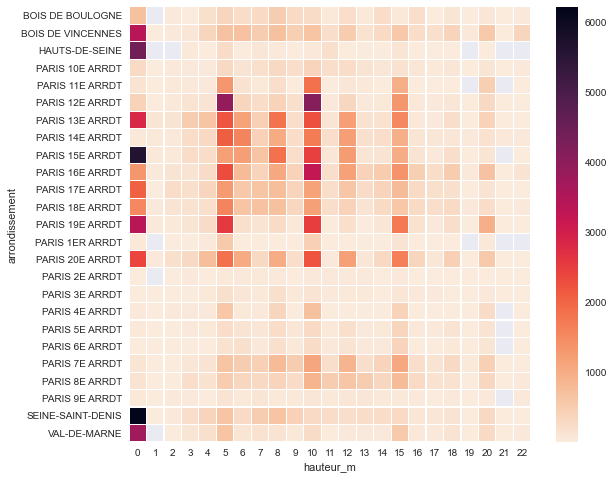

In [47]:
cmap = sns.cm.rocket_r
plt.figure(figsize=(9, 8))
sns.heatmap(data_to_plot[["arrondissement", "hauteur_m"
                    ]].pivot_table(index="arrondissement",
                                   columns="hauteur_m",
                                   aggfunc=len),
            linewidths=.1,
            cmap=cmap)

On peut déterminer quels outils prendre pour une tournée, à partir de cette heatmap, par arrondissement. On peut par exemple calculer, pour un arrondissement, la somme des arbres qui ont une hauteur inférieure à 3m et la somme des arbres qui ont une hauteur supérieure à 3m et observer laquelle des deux sommes est la plus haute.

Par exemple :
* Pour le 12E arrondissement, on peut voir que les arbres de grandes hauteurs sont majoritaires.
* Pour les Hauts-de-Seine, les arbres qui ont une hauteur inférieure à 3m sont majoritaires 

## Synthèse

Durant ces différentes étapes, nous avons vu comment un jeu de données peut divulguer énormément d’informations et à quel point son analyse peut rapidement devenir chronophage si l’on approfondit de plus en plus la recherche.

Actuellement, pour la démonstration, nous avons simplement exploré de manière superficielle et proposé quelques solutions d’optimisations. Nous aurions pu aller beaucoup en analysant les différentes espèces au cas par cas, étudier les lieux, etc.

Ce qui peut être proposé serait une application où les employés peuvent avoir une carte sur laquelle les chemins les optimisés sont indiqués grâce à différent filtres comme la domanialité ou la dimension de l’arbre.